### Decision Tree Regression

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step - 1 Data ingestion

In [4]:
import pandas as pd
df = pd.read_csv("PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Columns descrtiption
1. AT - Atmosperic Temperature(Degree Celsius)
2. V - Vaccum PRessure inside the boiler Pascals
3. AP - Atmosperic Pressure pascal
4. RH - Relative humedity in %
5. PE - Power output of the plant in mega watts
6. Target feature in PE - Which is numerical in nature

### Step 2 - Perform basic in data quality check

In [5]:
df.shape

(9568, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [7]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(41)

In [9]:
# DRop the duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [10]:
df.shape

(9527, 5)

### Step 3- Separate X and Y(PE)

In [11]:
X = df.drop(columns=["PE"])
Y = df[["PE"]]

In [12]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [13]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


<Axes: xlabel='PE', ylabel='Count'>

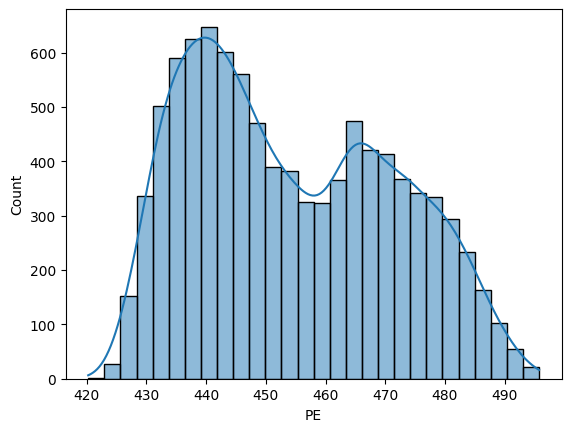

In [14]:
import seaborn as sns
sns.histplot(data=Y, x="PE", kde=True)

### Step 4 - Apply Preprocessing on X

In [15]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [18]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


### Step 5 - Apply train test split

In [19]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [20]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [21]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [22]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [23]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [24]:
xtrain.shape

(7621, 4)

In [25]:
xtest.shape

(1906, 4)

### Step 6 - Model Building and Tuning

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
model1 = DecisionTreeRegressor(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="squared_error"
)
model1.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=5, min_samples_split=5)

In [46]:
model1.score(xtrain, ytrain)

0.71765957297802

In [47]:
model1.score(xtest,ytest)

0.7251450398190291

### TO tune model faster you can use Randmoised Search CV

In [48]:
params = {
    "max_depth": [5, 6, 7, 8, 9, 10, 11, 12, 13],
    "min_samples_split": [5, 6, 7, 8, 9],
    "min_samples_leaf": [5, 6, 7, 8, 9],
    "criterion": ["squared_error", "absolute_error"]
}

In [49]:
params

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13],
 'min_samples_split': [5, 6, 7, 8, 9],
 'min_samples_leaf': [5, 6, 7, 8, 9],
 'criterion': ['squared_error', 'absolute_error']}

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
base_model = DecisionTreeRegressor()

rscv = RandomizedSearchCV(base_model, param_distributions=params, cv=5, scoring="r2", n_jobs=-1)

rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13],
                                        'min_samples_leaf': [5, 6, 7, 8, 9],
                                        'min_samples_split': [5, 6, 7, 8, 9]},
                   scoring='r2')

In [52]:
rscv.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 8,
 'criterion': 'absolute_error'}

In [53]:
rscv.best_score_

np.float64(0.9400340500049481)

In [55]:
best_dtc = rscv.best_estimator_
best_dtc

DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      min_samples_leaf=5, min_samples_split=5)

### Step 7 - Model Evaluation

In [56]:
best_dtc.score(xtrain, ytrain)

0.9511205946324592

In [57]:
best_dtc.score(xtest, ytest)

0.9441057931410449

In [58]:
from sklearn.metrics import (
    root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
)

In [59]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [60]:
print("Training Result :")
evaluate_model(best_dtc, xtrain, ytrain)

Training Result :
RMSE : 3.75
MAE : 2.63
MAPE : 0.58%
R2 : 95.11%


In [62]:
print("Testing Result :")
evaluate_model(best_dtc, xtrain, ytrain )

Testing Result :
RMSE : 3.75
MAE : 2.63
MAPE : 0.58%
R2 : 95.11%


In [63]:
print("Testing Result:")
evaluate_model(best_dtc, xtest, ytest)

Testing Result:
RMSE : 4.11
MAE : 3.04
MAPE : 0.67%
R2 : 94.41%


### R2 score both in train and test is greater than 0.8 hence it is a good model

### and can use this for out of sample prediction

In [64]:
best_dtc.feature_importances_

array([0.83091493, 0.13417859, 0.01685146, 0.01805502])

In [ ]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [67]:
imp = pd.Series(best_dtc.feature_importances_, index=xtrain.columns)
imp

AT    0.830915
V     0.134179
AP    0.016851
RH    0.018055
dtype: float64

In [68]:
imp.sort_values(ascending=False)

AT    0.830915
V     0.134179
RH    0.018055
AP    0.016851
dtype: float64

<Axes: >

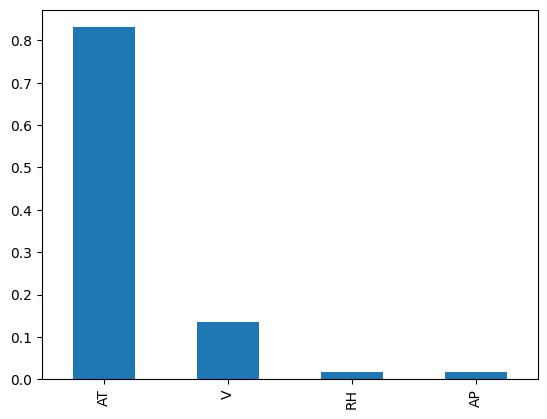

In [69]:
imp.sort_values(ascending=False).plot(kind="bar")

### Step 8 - Perform out of sample prediction

In [70]:
xnew = pd.read_csv("test_PowerPlant.csv")
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [71]:
xnew.shape

(100, 4)

In [72]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [73]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()


,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [74]:
preds = best_dtc.predict(xnew_pre)
preds[0:5]

array([443.88 , 438.545, 430.74 , 443.05 , 464.86 ])

In [75]:
xnew["PE_pred"] = preds

In [76]:
xnew = xnew.round(2)

In [77]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,443.88
1,28.88,54.89,1007.16,46.60,438.54
2,27.89,73.21,1001.32,85.88,430.74
3,25.69,62.26,1011.38,74.08,443.05
4,12.16,40.81,1025.79,70.97,464.86
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.56
96,11.78,39.96,1011.37,82.95,475.16
97,5.62,41.38,1020.91,86.21,484.76
98,24.96,74.99,1008.25,80.52,436.24


In [78]:
xnew.to_csv("Results.csv", index=False)

<Axes: xlabel='PE_pred', ylabel='Count'>

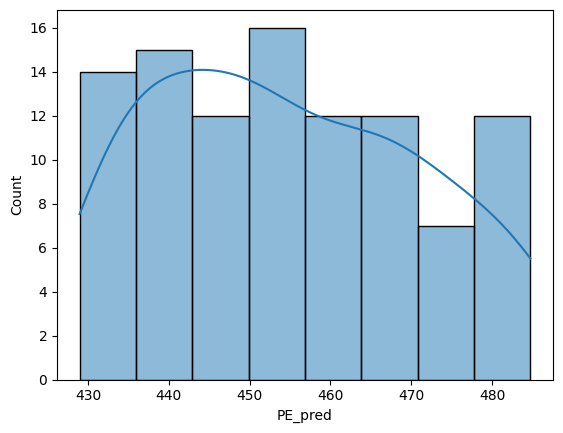

In [79]:
sns.histplot(data=xnew, x="PE_pred", kde=True)

### Step 9 - Save the Preprocessor and the model object in joblib format

In [81]:
%pip install --upgrade joblib

Note: you may need to restart the kernel to use updated packages.


In [82]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [83]:
best_dtc

DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      min_samples_leaf=5, min_samples_split=5)

In [84]:
import joblib
joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [85]:
joblib.dump(best_dtc, "plant_model.joblib")

['plant_model.joblib']

### Load the models

In [86]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [87]:
m = joblib.load("plant_model.joblib")
m

DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      min_samples_leaf=5, min_samples_split=5)